In [2]:
# Import usual packages
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
import scipy.constants as const
from scipy import stats
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import beta
from scipy.stats import norm
from scipy.optimize import minimize
from tabulate import tabulate
import math
%matplotlib inline

# Rejection Method
The probability density function for beta is 
\begin{equation}
f(x, a, b) = \frac{\Gamma(a+b)x^{a-1}*(1-x)^{b-1}}{\Gamma(a)\Gamma(b)}
\end{equation}
for $0<=x<=1, a>0, b>0$ where $\Gamma$ is the gamma function (scipy.special.gamma). Beta takes a and b as shape parameters. <br>
For this lab, $\alpha=5.0$ and $\beta=3.$




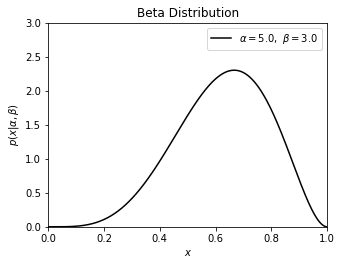

In [3]:
x = np.linspace(0, 1, 1002)[1:-1]
fig, ax = plt.subplots(figsize=(5, 3.75))
a=5
b=3
dist = beta(a, b)
plt.plot(x, dist.pdf(x), ls="-", c='black',label=r'$\alpha=%.1f,\ \beta=%.1f$'% (a, b))
plt.xlim(0, 1)
plt.ylim(0, 3)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title('Beta Distribution')
plt.legend(loc=0)

plt.show()


## Uniform Sampling

In [4]:
# MC Sampling using uniform distribution
def keep(N):
    # Find the max value of beta (alpha=5.0, beta=3.), denoted beta_max
    a = 5
    b = 3
    beta_dist = beta(a, b) # Draw beta dist. for given parameters
    x_max = (a - 1) / (a + b - 2) # Find x value at beta_max
    beta_max = beta_dist.pdf(x_max) # Corresponding beta_max value
    # Set starting parameters at zero iterations and empty arrays to fill with accepted w(x_i) values and count iterations
    i = 0 # Indexing 
    accept = np.zeros(N)
    iterations = 0
    # Define event weight function w(x) as the beta dist.
    def W(x): 
        a = 5
        b = 3
        return beta.pdf(x, a, b)
    # For each x_i, compute the event weight, w(x_i), and only keep x_i when w(x_i)<y
    # Continue iterations of function w(x_i) for i number of times until N iterations are accepted; i=N
    while i < N:
        iterations = iterations + 1 # Counts the number of total iterations (accepted and rejected)
        x = random.uniform(low=0., high=1.0, size=1) # A single uniform dist. sample x_i in [0,1]
        y = random.uniform(low=0., high=beta_max, size=1) # A single uniform dist. sample y_i in [0,beta_max]
        w = W(x) # Compute event weight
        # Condition to continue iterations of sampling and finding w(x_i) 
        if w <= y: 
            accept[i] = x
            i = i + 1
    return accept, iterations

# Generate this sample until accepted events N=1000 events
keep_uniform, iterations_uniform = keep(1000) 

#### Questions

1. What is the event weight formula?

The event weight formula is 

\begin{equation}
w(x)=\frac{f(x)}{g(x)} \\
\end{equation}

Where a uniform distribution sample y in the scaled interval $[0, beta_{max}]$ is compared to $w(x_i)$ 

\begin{equation}
g(x)=1 \\
so, \\
w(x)=beta(\alpha=5, \beta=3)
\end{equation}




2. What is the total number of samplings (pairs of x, y) required for this MC simulation? 

In [17]:
print("The total number of samplings taken was:", iterations_uniform)

The total number of samplings taken was: 1811


## Gaussian Sampling
Repeat steps above but for gaussian distribution sample x.

In [18]:
# For each x_i NOW IN GAUSSIAN SAMPLE, compute the event weight, w(x_i), and only keep x_i when w(x_i)<y
# Function used is the same as before, but the sample x will be taken from a gaussian distribution with parameters to more closely 
# resemble the beta distribution.
def keep_gaussian(N):
    # Same as before, setup for counting and storing samples; find beta_max
    i = 0
    accept = np.zeros(N)
    iterations = 0
    beta_dist = beta(a, b)
    x_max = (a - 1) / (a + b - 2)
    beta_max = beta_dist.pdf(x_max)
    # Event weight formula is the same
    def W(x):
        a = 5
        b = 3
        return beta.pdf(x, a, b)
    # for a random sample of x from the gaussian, let mean=0.6 and scale=0.5 to resemble the beta distribution as closely as possible 
    while i < N:
        iterations = iterations + 1
        x = random.normal(loc=x_max, scale=2, size=1) 
        y = random.uniform(low=0., high=beta_max, size=1)
        w = W(x)
        if w <= y:
            accept[i] = x
            i = i + 1
    return accept, iterations

# Generate this sample until accepted events N=1000 events
keep_norm, iterations_norm = keep_gaussian(1000)         
print("The number of samplings taken was:", iterations_norm)


The number of samplings taken was: 1106


#### Questions

1. What is your choice of Gaussian Distribution parameter for the importance sample?

I chose loc=x_max and scale=0.5 based on the initial given beta distribution whose peak is around x=0.6 and half width is about 0.4. The gaussian distribution parameters are such that the distribution being sampled from more closely resembles the beta distribution. When the distribution being sampled from (gaussian) overlaps more with the distribution being generated (beta), the more likely a single iteration (sample of x and calculated weighted function) will be accepted. 

2. What is the event weight formula?

The event weight formula is the same as before: 
\begin{equation}
w(x)=beta(\alpha=5, \beta=3)
\end{equation}

3. What is the total number of samplings (pairs of x, y) required for this MC simulation? How is this compared to the uniform sampling?

In [7]:
print('The total number of samplings is:', iterations_norm)

The total number of samplings is: 1105


The total number of gaussian samplings is less than the number required for uniform sampling. This makes sense as the sampled distribution here more closely represents the beta distribution, so accepted instances are more likely.

## Visualization

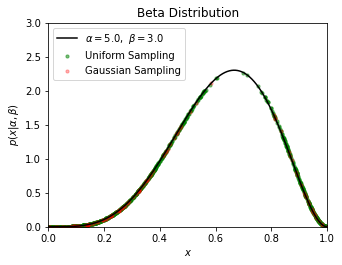

In [19]:
x = np.linspace(0, 1, 1002)[1:-1]
fig, ax = plt.subplots(figsize=(5, 3.75))
a=5
b=3
dist = beta(a, b)
ax.plot(x, dist.pdf(x), ls="-", c='black',label=r'$\alpha=%.1f,\ \beta=%.1f$'% (a, b))
plt.xlim(0, 1)
plt.ylim(0, 3)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title('Beta Distribution')
plt.legend(loc=0)


ax.scatter(keep_uniform, beta(a, b).pdf(keep_uniform), s=10, c='g', alpha=0.5, label='Uniform Sampling')

ax.scatter(keep_norm, beta(a, b).pdf(keep_norm), s=10, c='r', alpha=0.3, label='Gaussian Sampling')

ax.legend()

# Sphere in 3D

## Uniform Density
Determine the mass of a sphere with uniform density
$𝜌_0 = 2𝑘𝑔/𝑚^3$. The sphere has a radius of 1 meter, and we initially integrate it with 𝑁 = 100 points.

In [20]:
# Define function to determine mass of a uniform sphere using monte carlo integration
def MC_Uniform(N):
    # Generate an array of N random numbers for the x, y, and z coordinates.
    # Make sure that all the points lie in a cube enclosing the sphere.
    points = np.zeros((N, 3)) 
    points[:, 0] = np.random.uniform(low=-1, high=1, size=N)
    points[:, 1] = np.random.uniform(low=-1, high=1, size=N)
    points[:, 2] = np.random.uniform(low=-1, high=1, size=N)
    radii = np.zeros(N)
    # Generate an index function. Function makes an array to append 1 (hit) or 0 (miss) for condition of inside sphere of radius=1
    def in_sphere(points):
        inside = []
        for j in range(N):
            radius = np.sqrt((points[j, 0] ** 2) + (points[j, 1] ** 2) + (points[j, 2] ** 2))
            if radius < 1:
                inside.append(1)
                radii[j] = radius
            else: 
                inside.append(0)
        return inside
    # Calculate the mass and uncertainty of mass by applying the Monte Carlo integration method.
    inside = in_sphere(points)
    m = 8 * 2 * np.count_nonzero(inside) / N #V/N *2*count f is sum density*hit
    mass_uncertainty = 8 * 2 * np.std(radii) / np.sqrt(N)
    return m, mass_uncertainty


In [21]:
# Calculate mass and its uncertainty for N=100
mass_N100, unc_N100 = MC_Uniform(100)
print('The estimated mass for N=100 is:', mass_N100)
print('The uncertainty in the mass for N=100 is:', unc_100)
    
mass = 8 * math.pi / 3 
print('The theoretical mass of the sphere is:', mass)

The estimated mass for N=100 is: 9.92
The uncertainty in the mass for N=100 is: 0.006880000000000002
The theoretical mass of the sphere is: 8.377580409572781


In [22]:
# Change N from 100 to 100K with 100 steps.  
Y = np.linspace(100, 100000, 100, dtype = int)
m_list = np.zeros(100) 
m_variance = np.zeros(100)
uncertainty = np.zeros(100)

for i in range(100):
    m_val, m_unc  = MC_Uniform(Y[i])
    m_list[i] = m_val # list of masses from N of 100 to 100k in 100 steps
    uncertainty[i] = np.sqrt(np.var(m_list) / (Y[i] * (Y[i] - 1))) # The mean squared error
    
    
m_100 = MC_Uniform(100)
print('The mass for N from 100 to 100k in 100 steps is:', m_100)
unc_100 = uncertainty[0]
print('The uncertainty for N from 100 to 100k in 100 steps is:', uncertainty[0])
mass = 8 * math.pi / 3 
print('The theoretical mass of the sphere is:', mass)

The mass for N from 100 to 100k in 100 steps is: (7.84, 0.6415958897464075)
The uncertainty for N from 100 to 100k in 100 steps is: 0.008160000000000006
The theoretical mass of the sphere is: 8.377580409572781


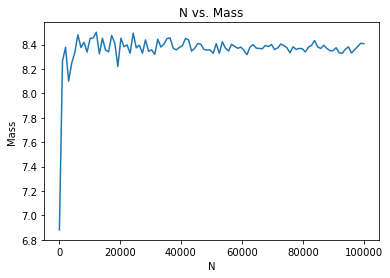

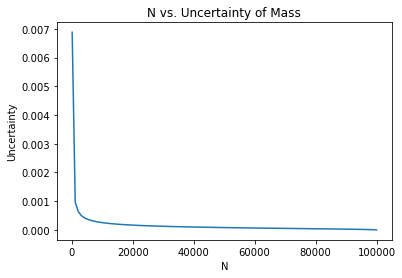

In [12]:
# Plot the mass as function of N, and uncertainty of mass as function of N.
plt.plot(Y, m_list)
plt.title('N vs. Mass')
plt.xlabel('N')
plt.ylabel('Mass')
plt.show()

plt.plot(Y, uncertainty)
plt.title('N vs. Uncertainty of Mass')
plt.xlabel('N')
plt.ylabel('Uncertainty')
plt.show()

#### Comment on the convergence of integration and agreement with the theoretical value m 

The Monte Carlo Method converges at a rate of $1/N^2$, which most closely resembles the plot of uncertainty of mass as a function of N. The theoretical value of m is 8.33 kg, which is not in agreement with calculated mass and its uncertainty.

## Linear Density
Given linear Density of $p(r) = p_0*r$, the nth moment of the mass distribution is  
\begin{gather*}
m_n = \sum_{j=1}^{N}x^{n}_{j}\delta{m_j}
\end{gather*}



In [35]:
# Function for MC integration for linear density
def MC_Linear(N):
    # Generate an array of N random numbers for the x, y, and z coordinates.
    # Make sure that all the points lie in a cube enclosing the sphere.
    points = np.zeros((N, 3)) 
    points[:, 0] = np.random.uniform(low=-1, high=1, size=N)
    points[:, 1] = np.random.uniform(low=-1, high=1, size=N)
    points[:, 2] = np.random.uniform(low=-1, high=1, size=N)
    # Generate an index function. 
    # Function makes an array to append 1 (hit) or 0 (miss) for condition of inside sphere of radius=1
    def in_sphere(points):
        inside = []
        radius = np.zeros(N)
        samples = 0
        for j in range(N):
            radius[j] = np.sqrt((points[j, 0] ** 2) + (points[j, 1] ** 2) + (points[j, 2] ** 2))
            if radius[j] < 1:
                inside.append(1)
            else: 
                inside.append(0)
            samples += 1
        return inside, radius, samples
    # Calculate the mass and uncertainty of mass by applying the Monte Carlo integration method.
    i, r, counts = in_sphere(points)
    p0 = 2 # Given
    f_sum = 0 # Initialize count of hits  
    for k in range(N): 
        density = p0 * r[k] # Calculate linear density for r_k, given as p=(p_0)(r)
        f_sum = f_sum + (density * i[k]) # Continue to add onto total sum of hits 
    m = (8 / N) * f_sum # total mass calculation
    return m, counts

In [37]:
# Integrate with N=100
m_100_l, c = MC_Linear(100)
print('The mass using N=100 is:', m_100_l)

The mass using N=100 is: 6.849861004045984


In [39]:
# Change N from 100 to 100K with 100 steps and integrate
z = np.linspace(100, 100000, 100, dtype=int)
m_list = np.zeros(100) 
m_variance = np.zeros(100)
uncertainty = np.zeros(100)

for i in range(100):
    m_vals = MC_Uniform(z[i])
    m_list[i] = m_val
    uncertainty[i] = np.sqrt(np.var(m_list) / (Y[i] * (Y[i] - 1))) # The mean squared error
    
m_linear = m_list
print('The mass using N=100 to 100k in 100 steps is:', m_list)

The mass using N=100 to 100k in 100 steps is: [8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512
 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512
 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512
 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512
 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512
 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512
 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512
 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512
 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512
 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512 8.3512]


# Bonus
Consider a density that is a unit exponential function of the radius according to $\rho(r)=\frac{1}{\rho_{0}e^{-\rho_{0}r}}$.